<a href="https://colab.research.google.com/github/HectorRPabon/Colab/blob/main/M3_4_ClimateSERVpy_API_raster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

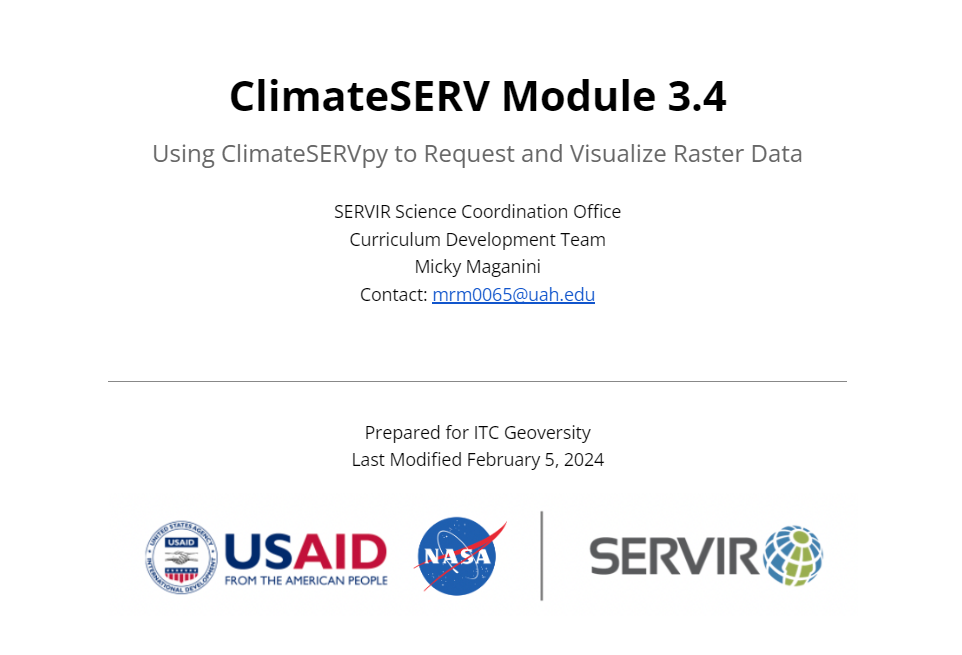

# Learning Objectives

By the end of this module, you will be able to

* **Request** data from ClimateSERV using the ClimateSERVpy Python API and store it on your Google Drive.
* **Manipulate** and **visualize** data from Climatserv using the Google Earth Engine Python package `geemap`.

# Prerequisites

To take this module you will need a Google Drive Account.
---


Welcome to Module 3.4! In the last module, we explored how to request and visualize tabular data (like .csv files) with ClimateSERVpy. This tabular data is great for getting a big-picture idea of trends in your area of interest. But what if you want the data representing the whole area of interest?

In this case, we may want to request raster data from ClimateSERV, which we can do in the form of either NetCDF or .tif files.

In Part 1, we will install some prerequisite packages and "Mount Google Drive" so we can work with Google Earth Engine and Google Drive to store, manipulate, and visualize data obtained from ClimateSERV.

In Part 2, we will visualize the raster data we got from ClimateSERV.

This notebook is written so that you can run each code cell exactly as it is written. There are a couple places where you can change the code, but this is optional.

#**IMPORTANT** : Before going further, click **File** --> **Save A Copy in Drive**. Then, please exit out of the original copy and give the file a new name in your Google Drive.


---



# **Part 1**

In Part 1 we will install the climateserv and rasterio packages which will allow us to download and visualize raster data respectively.

In [1]:
!pip install climateserv rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 61.0 MB/s eta 0:00:00


Now that we have installed climateserv and geemap, we can import the packages into this notebook to request data from ClimateSERV. We will import a couple other packages as well.

In [2]:
import climateserv.api
import os
import rasterio
import matplotlib.pyplot as plt
from rasterio.plot import show
from google.colab import drive
from zipfile import ZipFile

**Note: If you get the error "Transport endpoint is not connected" for any of the cells in Chapter 1 Step 2, click on Runtime --> Disconnect and Delete Runtime**

Now that we have connected our Google Earth Engine Account to this Colab notebook, we will be able to visualize raster data here. Our next step is to "mount" Google Drive, which will allow us to save the data we request from ClimateSERV on our Drive.

Again, follow the instructions in the pop-up window to connect with your Google Drive account.

In [3]:
drive.mount('/content/drive/')

Mounted at /content/drive/


We can now use the `cd` command in Python, which stands for "choose directory", to navigate to a Google Drive folder of our choice..

For more information regarding selecting your working directory in Google Colab, visit [this site](https://saturncloud.io/blog/how-to-change-the-path-in-google-colab/#:~:text=One%20of%20the%20simplest%20ways,the%20current%20working%20directory%20instantly.).

In [4]:
cd drive/MyDrive/climateserv_exports/

/content/drive/MyDrive/climateserv_exports


Now we will use the `mkdir` method to make a directory where we can store our ClimateSERV data. If you have already ran the cell below (or already have a folder with the name `climateserv_data` in your Google Drive, the below cell will give you an error). Ifthat is the case, you can simply continue to the next cell.

In [ ]:
os.mkdir("climateserv_rasteios")

In [ ]:
cd climateserv_exports

[Errno 2] No such file or directory: 'climateserv_exports'
/content/drive/MyDrive/climateserv_raster


We can use the `pwd` command, which stands for "print working directory", to see our current directory or folder, which is now our climateserv folder

In [5]:
pwd

'/content/drive/MyDrive/climateserv_exports'

We can use the `ls` command to list the files that are in our current directory. This is helpful in ClimateSERV because it allows us to check and make sure data we requested from climateSERV is actually in our directory.

If we are in an empty folder in Google Drive, the code cell below will run, but will not print anything to the console. We can see that will change later on in this Module as we import data from ClimateSERV to this folder.

In [6]:
ls

forecasted_precip.csv  imerg_precip_2.csv


---
# **Chapter 2: Example Code**



Below you can find a generic code block that can be used to request data from ClimateSERV. You can run the code cell as is or

In order to request data from ClimateSERV, we need to define a set of parameters to give to the `climateserv.api.request_data` method. These parameters include a region of interest (`geometry`),a dataset of interest (`dataset`), a time period of interest (`start_date` and `end_date`), a spatial reducer (`reducer`), an output path (`outfile`) to write our data to. If we are requesting the NMME forecast data, we also need to specify the forecast ensemble we want to use (`ensemble`) as well as which variable we are requesting (`variable`). If we are not requesting the NMME forecast data, we can define these variables as empty strings.

You can find more information for how each parameter should be defined in the appendix located at the bottom of this document

In [7]:
geometry = [[-73.046, 3.679], [-73.046, 4.539], [-75.617, 4.539], [-75.617, 3.679]]
dataset = 0
operation = 'Download'
start_date = "08/01/2024"
end_date = "09/01/2024"
ensemble = ''
variable = ''
outfile = 'chirps_data_v2.zip'

We can now run the `climateserv.api.request_data` method with the parameters defined above.

You will then receive feedback from ClimateSERV that will tell you if you were successful in requesting your data. If you get an output saying "Could not write CSV data to the console..." ClimateSERV will provide an indication in the output regarding what went wrong. It could be that you mispelled the dataset name, or used the wrong format of your dates. You can see the format ClimateSERV requests data in the appendix at the bottom of this document.

In [8]:
climateserv.api.request_data(dataset, operation, start_date, end_date, geometry, ensemble, variable, outfile)

New Script Run, Dataset: 0
Data request submitted. Request ID: e0a925ca-2077-406d-9960-95afcc8875e3
Progress: 0.0
Progress: 98.5
Data request is complete.
Data for JobID: e0a925ca-2077-406d-9960-95afcc8875e3 was downloaded to file: chirps_data_v2.zip
Exiting...


Now that we have downloaded the data from climateserv to our Google Drive, let's again use the `ls` method to list the files in our working directory

In [9]:
os.mkdir('unzipped_files')

In [10]:
ls

chirps_data_v2.zip  forecasted_precip.csv  imerg_precip_2.csv  unzipped_files/


In [13]:
#Extract the downloaded data on the directory creater
with ZipFile("/content/drive/MyDrive/climateserv_exports/chirps_data_v2.zip", 'r') as zObject:
  zObject.extractall(
      path = "/content/drive/MyDrive/climateserv_exports/unzipped_files"
  )

In [14]:

cd unzipped_files/

/content/drive/MyDrive/climateserv_exports/unzipped_files


In [15]:
ls

20240801.tif  20240808.tif  20240815.tif  20240822.tif  20240829.tif
20240802.tif  20240809.tif  20240816.tif  20240823.tif  20240830.tif
20240803.tif  20240810.tif  20240817.tif  20240824.tif  20240831.tif
20240804.tif  20240811.tif  20240818.tif  20240825.tif  20240901.tif
20240805.tif  20240812.tif  20240819.tif  20240826.tif
20240806.tif  20240813.tif  20240820.tif  20240827.tif
20240807.tif  20240814.tif  20240821.tif  20240828.tif


As we can see, we have a .tif file for each day of data. Let's use the rasterio package to visualize one of the .tif files.

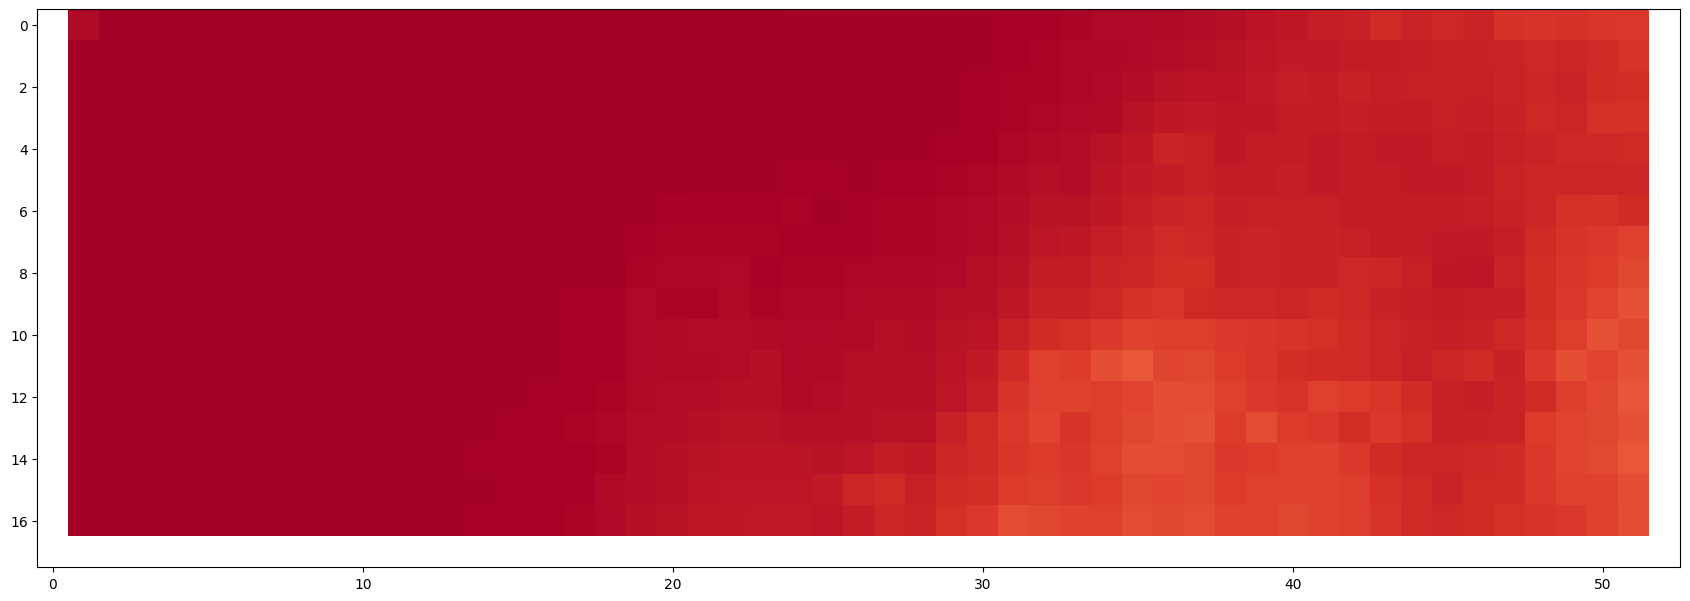

In [18]:
rasterfile = rasterio.open('20240827.tif')
raster = rasterfile.read(1)
plt.figure(figsize = (17, 15))
plt.imshow(raster, cmap = "RdYlBu", vmin = 0, vmax = 30)
plt.tight_layout()
plt.show()

# **Appendix: Arguments for the api_request_data Method**

This appendix provides more information regarding each argument to the `climateserv.api_request_data` method. Each heading below is an argument that can be given to ClimateSERV. The text in parentheses next to the Argument specifies how we defined this parameter in this notebook. You can find more information regarding the ClimateSERVpy API [website](https://climateserv.servirglobal.net/python-api) or [Pypi website](https://pypi.org/project/climateserv/) and [Conda website](https://anaconda.org/SERVIR/climateserv)


**Dataset of Interest (`dataset`):**

This parameter must be fed as a string to the `request_data` method in ClimateSERV. Each dataset within climateserv has a specific string associated with it, which can be found in the [ClimateSERV Dataset Encyclopedia.](https://docs.google.com/document/d/17u7V5wlqEDVNv2v48m_crsk66D0Rd4nwpeg3BnlRkgU/edit?usp=sharing)

* 91 `"IMERG_early"`: NASA-IMERG Early 1 day
* 26 `"IMERG"`: NASA-IMERG Late 1 Day
* 33 `"ESI_12"`: SPoRT Evaporative Stress Index 12-Weeek
* 29 `"ESI_4"`:SPoRT Evaporative Stress Index 4-Week
* 37 `"USDA_SMAP"`: USDA SMAP Soil Moisture Profile
* 38 `"USDA_SSSM"`: USDA SMAP Subsurface Soil Moisture
* 39 `"USDA_SSSMA"`: USDA SMAP Subsurface Soil Moisture Anomlay
* 40 `"USDA_SSM"`: USDA Surface Soil Moisture
* 41 `"USDA_SSMA"`: USDA Surface Soil Moisture Anomaly
* 90 `"CHIRP"`: UCSB CHIRP Rainfall
* 0 `"CHIRPS"`: UCSB CHIRPS Rainfall with Stations
* 28 `"CentralAsia_eMODIS"`: USGS eMODIS NDVI Central Asia
* 2 `"EastAfrica_eMODIS"`: USGS eMODIS NDVI East Africa
* 5 `"SouthAfrica_eMODIS""`: USGS eMODIS NDVI Southern Africa
* 1 `"WestAfrica_eMODIS"`: USGS eMODIS NDVI West Africa
* 32 `"CHIRPS_GEFS_precip_mean"`: UCSB CHIRPS-GEFS 10-day forecast mean precipitation
* 31 `"CHIRPS_GEFS_anom"`: UCSV CHIRPS-GEFS 10-day forecast mean anomaly
* `"CCSM4"`: NMME Community Climate System Model version 4
**  6 NMME ccsm4 ens01 Temperature
**  7 NMME ccsm4 ens01 Precipitation
**  8 NMME ccsm4 ens02 Temperature
**  9 NMME ccsm4 ens02 Precipitation
** 10 NMME ccsm4 ens03 Temperature
** 11 NMME ccsm4 ens03 Precipitation
** 12 NMME ccsm4 ens04 Temperature
** 13 NMME ccsm4 ens04 Precipitation
** 14 NMME ccsm4 ens05 Temperature
** 15 NMME ccsm4 ens05 Precipitation
** 16 NMME ccsm4 ens06 Temperature
** 17 NMME ccsm4 ens06 Precipitation
** 18 NMME ccsm4 ens07 Temperature
** 19 NMME ccsm4 ens07 Precipitation
** 20 NMME ccsm4 ens08 Temperature
** 21 NMME ccsm4 ens08 Precipitation
** 22 NMME ccsm4 ens09 Temperature
** 23 NMME ccsm4 ens09 Precipitation
** 24 NMME ccsm4 ens10 Temperature
** 25 NMME ccsm4 ens10 Precipitation
* `"CFSV2"`: NMME Climate Forecast Model Version 2
** 42 NMME cfsv2 ens01 Temperature
** 43 NMME cfsv2 ens01 Precipitation
** 44 NMME cfsv2 ens02 Temperature
** 45 NMME cfsv2 ens02 Precipitation
** 46 NMME cfsv2 ens03 Temperature
** 47 NMME cfsv2 ens03 Precipitation
** 48 NMME cfsv2 ens04 Temperature
** 49 NMME cfsv2 ens04 Precipitation
** 50 NMME cfsv2 ens05 Temperature
** 51 NMME cfsv2 ens05 Precipitation
** 52 NMME cfsv2 ens06 Temperature
** 53 NMME cfsv2 ens06 Precipitation
** 54 NMME cfsv2 ens07 Temperature
** 55 NMME cfsv2 ens07 Precipitation
** 56 NMME cfsv2 ens08 Temperature
** 57 NMME cfsv2 ens08 Precipitation
** 58 NMME cfsv2 ens09 Temperature
** 59 NMME cfsv2 ens09 Precipitation
** 60 NMME cfsv2 ens10 Temperature
** 61 NMME cfsv2 ens10 Precipitation
** 62 NMME cfsv2 ens11 Temperature
** 63 NMME cfsv2 ens11 Precipitation
** 64 NMME cfsv2 ens12 Temperature
** 65 NMME cfsv2 ens12 Precipitation
** 66 NMME cfsv2 ens13 Temperature
** 67 NMME cfsv2 ens13 Precipitation
** 68 NMME cfsv2 ens14 Temperature
** 69 NMME cfsv2 ens14 Precipitation
** 70 NMME cfsv2 ens15 Temperature
** 71 NMME cfsv2 ens15 Precipitation
** 72 NMME cfsv2 ens16 Temperature
** 73 NMME cfsv2 ens16 Precipitation
** 74 NMME cfsv2 ens17 Temperature
** 75 NMME cfsv2 ens17 Precipitation
** 76 NMME cfsv2 ens18 Temperature
** 77 NMME cfsv2 ens18 Precipitation
** 78 NMME cfsv2 ens19 Temperature
** 79 NMME cfsv2 ens19 Precipitation
** 80 NMME cfsv2 ens20 Temperature
** 81 NMME cfsv2 ens20 Precipitation
** 82 NMME cfsv2 ens21 Temperature
** 83 NMME cfsv2 ens21 Precipitation
** 84 NMME cfsv2 ens22 Temperature
** 85 NMME cfsv2 ens22 Precipitation
** 86 NMME cfsv2 ens23 Temperature
** 87 NMME cfsv2 ens23 Precipitation
** 88 NMME cfsv2 ens24 Temperature
** 89 NMME cfsv2 ens24 Precipitation
* NSIDC SMAP Dataset
** 541 NSIDC SMAP Sentinel 1Km
** 542 NSIDC SMAP Sentinel 1Km 15 day
* LIS Datasets
** 661 LIS-modeled Evapotranspiration
** 662 LIS-modeled Baseflow
** 663 LIS-Modeled Runoff
** 664 LIS-Modeled Soil Moisture 0-10cm
** 665 LIS-Modeled Soil Moisture 10-40cm
** 666 LIS-Modeled Soil Moisture 40-100cm
** 667 LIS-Modeled Soil Moisture 100-200cm

**Seasonal Ensemble (`ensemble`):**
This parameter will be an empty string (`''`) unless your `dataset` was the NMME `'CFSV2'` or NMME `'CCSM4'` datasets. If your dataset was one of these datasets, your ensemble variable can be:

**Seasonal Variable (`variable`)**:

This parameter will be an empty string (`''`) unless your `dataset` was the NMME `'CFSV2'` or NMME `'CCSM4'` datasets. If your dataset was one of these datasets, your ensemble variable can be: `Temperature` or `Precipitation`.


**Operation Type (`operation_type`)**
ClimateSERVpy allows you to download data as tabular data or the raw raster data. The Tabular data provides timeseries information in the form of a .csv file. If you are requesting tabular data, as we are in this case, we need to pick a sptial reducer which will determine  how ClimateSERV will spatially reduce your data such that you have one value per date that represents your region of interest.

If downloading tabular data, set `operation_type` to be one of the following strings:
* `"Average"` will return the average value over all the pixels in your region of interest for each date.
* `"Min"` will return the minimum value over all the pixels in your region of interest for each date.
* `"Max"` will return the maximum value over all the pixels in your region of interest for each date.

If downloading raster data, set `operation_type` to be one of the following strings

* `"Download"`: Will Download your data as a .zip file of tifs
* `"NetCDF"`: will download your data as a NetCDF (.nc) file

**Start Date (`start_date`)**:

Your time period will be specified by two parameters, both of which will be strings (text enclosed with quotation marks). One parameter will outline the starting date of your period of interest in "MM/DD/YYYY" format.

**End Date (`end_date`)**:

Your time period will be specified by two parameters, both of which will be strings (text enclosed with quotation marks). One parameter will outline the starting date of your period of interest in "MM/DD/YYYY" format.

**Region of Interest (`geometry`):**

This parameter must be fed as a two-dimensional list of ordered coordinate pairs that outline a polygon (i.e. `[[lon_1, lat_1], [lon_2, lat_2], ..., [lon_x, lat_x] etc.])` where `lon_x and lat_x` are the longitudes and latitudes of each point, respectively.


**Output Path** (`outfile`)

This parameter will consist of a string that outlines the file name and file format you wish to request the data from ClimateSERV as. You can name the file whatever you want, but you must include one of the following file extensions at the end of your file name. The file extension will depend on the parameter you gave to the `operation_type` argument.

If your operation type was 'max', 'min', or 'average' (i.e. you were requesting tabular data), your output path must end with: `'.csv'`: Comma Separated Value File

If your operation type was 'Download', (i.e. you were requesting raster data) your output path must end with `'.zip'` , which will contain a a zip folder containing Tagged Image (.tif) files.